Тема урока: обработка исключений
Необязательный блок else
Необязательный блок finally
Общий шаблон конструкции try-except
Аннотация. Урок посвящен работе с исключениями.

Необязательный блок else

Помимо блоков try и except, в инструкции try-except может также использоваться необязательный блок else.

Блок else размещается после последнего ехсерt блока и содержит программный код, который выполняется только в том случае, если при выполнении кода в trу блоке ошибок (исключений) не было.

In [ ]:
try:
    pass
    # контролируемый код
except тип_ошибки_1:
    pass
    # код обработки ошибки (исключения)
except тип_ошибки_2:
    pass
    # код обработки ошибки (исключения)
# ...
except тип_ошибки_n:
    pass
    # код обработки ошибки (исключения)
else:
    pass
    # код для случая, если ошибки (исключения) не было

In [2]:
try:
    num = int(input())
    print('Квадрат числа равен:', num ** 2)
except ValueError:
    print('Вы ввели некорректные данные!')
else:
    print('Ошибки не произошло!')

print('Работа программы завершена!')

Квадрат числа равен: 100
Ошибки не произошло!
Работа программы завершена!


Блок else в конструкции try-except подобен блоку else в конструкциях for/while. Он срабатывает если в контролируемом коде не произошло ошибок (если тело цикла завершилось штатным способом, без break).

Необязательный блок finally

Помимо необязательного блока else, в инструкции try-except можно также использовать необязательный блок finally.

Блок finally размещается после последнего ехсерt блока, либо после блока else, если он присутствует, и содержит программный код, который выполняется в любом случае, независимо от того, возникла ошибка (исключение) при выполнении кода trу блока или нет.

In [ ]:
try:
    # контролируемый код
except тип_ошибки_1:
    # код обработки ошибки (исключения)
except тип_ошибки_2:
    # код обработки ошибки (исключения)
...
except тип_ошибки_n:
    # код обработки ошибки (исключения)
finally:
    # код, который выполняется всегда

In [3]:
try:
    num = int(input())
    print('Квадрат числа равен:', num ** 2)
except ValueError:
    print('Вы ввели некорректные данные!')
finally:
    print('Блок кода выполняется всегда!')

print('Работа программы завершена!')

Квадрат числа равен: 100
Блок кода выполняется всегда!
Работа программы завершена!


Блок finally располагается после блока else, в случае присутствия последнего.

Блок finally особенно удобен при работе с файлами, которые нужно обязательно закрывать, независимо от того, произошла ошибка (исключение) или нет.

In [4]:
try:
    file = open('data.txt', encoding='utf-8')
    try:
        text = file.read()
    except:
        print('При чтении из файла произошла ошибка!')
    else:
        print('Чтение из файла прошло успешно!')
    finally:
        file.close()
except FileNotFoundError:
    print('Файл с указанным именем не найден!')

Файл с указанным именем не найден!


демонстрирует возможность использования блока finally. В этом коде файл будет закрыт в любом случае, вне зависимости от того, произошла ошибка или нет. Обратите также внимание на вложенность блоков try-except.

Блоки try-except можно вкладывать один в другой. Python никак нас не ограничивает в количестве таких вложений.

Блок finally может также использоваться без блоков except и else. В этом случае, если в блоке try возникает ошибка (исключение), то сначала выполняется блок finally, а затем ошибка (исключение) продолжает «всплывание» к обработчику более высокого уровня.

In [5]:
try:
    file = open('data.txt', encoding='utf-8')
    try:
        text = file.read()
    finally:
        file.close()
except FileNotFoundError:
    print('Файл с указанным именем не найден!')
except:
    print('Произошла ошибка!')

Файл с указанным именем не найден!


Общий шаблон инструкции try-except

In [ ]:
try:
    # контролируемый код
except тип_ошибки_1:
    # код обработки ошибки (исключения)
except тип_ошибки_2:
    # код обработки ошибки (исключения)
...
except тип_ошибки_n:
    # код обработки ошибки (исключения)
else:
    # код для случая, если ошибки не было
finally:
    # код, который выполняется всегда

Примечания

Примечание 1. Необходимо заметить, что при наличии ошибки (исключения) и отсутствии блока except, инструкции внутри блока finally будут выполнены, но ошибка (исключение) не будет обработана. Она продолжит «всплывание» к обработчику более высокого уровня. Если пользовательский обработчик отсутствует, то управление передается обработчику по умолчанию, который прерывает выполнение программы и выводит сообщение об ошибке.

In [6]:
try:
    х = 10 / 0
finally:
    print('Блoк finally')

Блoк finally


ZeroDivisionError: division by zero

Примечание 2. Инструкции внутри блока finally будут выполнены, даже если блок try содержит break, continue, return.

Примечание 3. Следующая особенность работы блока finally связана с обработкой ошибок (исключений) внутри функций. Нужно знать, что блок finally выполняется до return.

In [7]:
def func():
    try:
        return 10
    finally:
        print('Выполняется блок finally!')

print(func())

Выполняется блок finally!
10


Примечание 4. Интересна ситуация, когда возврат из функции (return) осуществляется как в блоке try, так и в блоке finally. Поскольку блок finally выполняется до return, то результирующее значение будет получено именно из блока finally.

In [8]:
def func():
    try:
        return 10
    finally:
        return 20

print(func())

20


Примечание 5. Язык Python поддерживает протокол менеджеров контекста с помощью ключевого слова with. Этот протокол гарантирует выполнение завершающих действий (например, закрытие файла) вне зависимости от того, произошла ошибка (исключение) внутри блока кода или нет. 

In [ ]:
with open('data.txt', 'r', encoding='utf-8') as file:
    text = file.read()

примерно равнозначен коду:

In [ ]:
try:
    file = open('data.txt', 'r', encoding='utf-8')
    try:
        text = file.read()
    finally:
        file.close()
except:
    pass

Предпочтение всегда стоит отдавать менеджерам контекста (ключевое слово with), а не блоку try-finally.

In [11]:
def f():
    try:
        x = 10
        return x
    finally:
        x = 20
          
print(f())

10


Как мы знаем, код в блоке finally выполняется до оператора return, поэтому можно предположить, что после выполнения приведенного выше кода будет выведено значение 20, хотя на самом деле выведено будет 10. Дело в том, что оператор return сохраняет значение возвращаемой переменной, поэтому дальнейшее присвоение переменной x нового значения не повлечет за собой изменения возвращаемого функцией значения.

Проиллюстрировать это можно следующий образом:

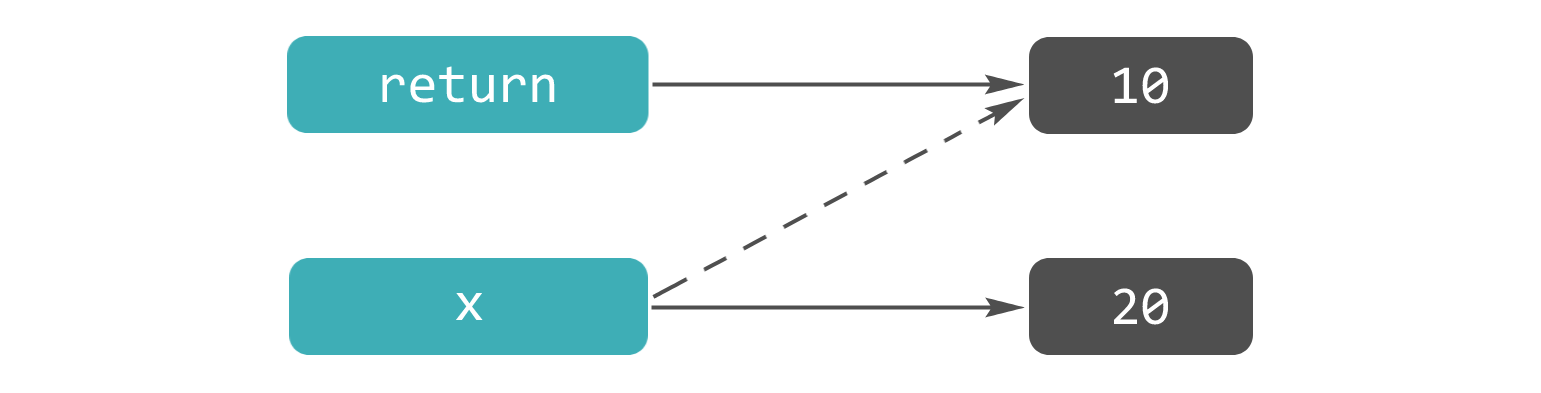

In [9]:
from functions import picture
picture('Новый проект (1) (7).png')

Для большего понимания рассмотрим следующий код:

In [10]:
def f():
    try:
        x = [10]
        return x
    finally:
        x.append(20)
          
print(f())

[10, 20]


Теперь в переменной x содержится изменяемый объект — список [10]. Оператор return сохраняет данный список в качестве возвращаемого значения, но мы по-прежнему можем к нему обратиться и, например, добавить в него значение 20. Так как оператор return по-прежнему ссылается на этот же список, после выполнения приведенного выше кода будет выведено [10, 20].

In [12]:
def f():
    try:
        return 10
    except:
        pass
    else:
        return 20
          
print(f())

10


Код в блоке else, в отличие от кода в блоке finally, не выполняется всегда, поэтому после первого вызова оператора return со значением 10 функция завершит свое выполнение и уже не перейдет в блок else, несмотря на то что никаких исключений не возникло.

In [16]:
numbers = list(filter(int, ['1', '2', '3', '4', '5']))
print(numbers)

try:
    total = sum(numbers)
    print(total)
except:
    print('Произошла ошибка')
else:
    print('Ошибок не произошло')
finally:
    print('Завершение программы')

['1', '2', '3', '4', '5']
Произошла ошибка
Завершение программы


меня смутил этот фильтр. Там же True/False должно быть. Но, технически, непустая строка == True. Поэтому условие фильтрации проходит.

А потом меня порадовала функция sum() - он выдаст ошибку, что к int нельзя прибавить str. И, судя по всему, этот int будет браться как "начальное значение" непосредственно в самой функции sum(). Там, скорее всего, 0 вшит.

In [17]:
letters = {'a': 'A', 'b': 'B', 'c': 'C'}
result = None

try:
    result = letters['B']
except:
    print('Произошла ошибка')
else:
    print('Ошибок не произошло')
finally:
    print('Завершение программы')
    
print(result)

Произошла ошибка
Завершение программы
None


Январь, февраль, ...
Напишите программу с использованием конструкции try-except, которая выводит название месяца, соответствующее введенному целому числу (от 1 до 12 включительно), причем

если введенное число не принадлежит отрезку [1;12], программа должна вывести текст:
Введено число из недопустимого диапазона
если введенное значение не является целым числом, программа должна вывести текст:
Введено некорректное значение
Формат входных данных
На вход программе подается единственная строка с произвольным значением.

Формат выходных данных
Программа должна вывести полное название месяца на английском, соответствующее введенному числу (от 1 до 12 включительно) или текст с соответствующей ошибкой, если введенное значение некорректно.

Примечание 1. Для получения списка с названиями месяцев вспомните атрибут month_name из модуля calendar.

In [37]:
import calendar

months = dict(zip(list(range(1, 13)), list(calendar.month_name)[1:]))
# print(months)

# request = int(input())
# request = 1
request = 'четыре'
# request = 13
try:
    range(1,13)[request]
    print(months[request])
except TypeError:
    print('Введено некорректное значение')
except IndexError:
    print('Введено число из недопустимого диапазона')

Введено некорректное значение


In [ ]:
from calendar import month_name

try:
    print(dict(enumerate(month_name[1:], 1))[int(input())])
except KeyError:
    print('Введено число из недопустимого диапазона')
except:
    print('Введено некорректное значение')

Функция add_to_list_in_dict()
Реализуйте функцию add_to_list_in_dict() с использованием конструкции try-except, которая принимает три аргумента в следующем порядке:

data — словарь списков, то есть словарь, значениями в котором являются списки
key — хешируемый объект
element — произвольный объект
Функция должна добавлять объект element в список по ключу key в словаре data. Если ключа key в словаре data нет, функция должна добавить его в словарь, присвоить ему в качестве значения пустой список и добавить в этот список объект element.

Примечание 1. Функция должна изменять переданный словарь и возвращать значение None.

Примечание 2. Элементы в список должны добавляться в конец.

Примечание 3. В тестирующую систему сдайте программу, содержащую только необходимую функцию add_to_list_in_dict(), но не код, вызывающий ее

In [44]:

def add_to_list_in_dict(data: dict, key:object, element: object):
    try:
        data[key].append(element)
    except:
        data[key] = [element]
    return None


data = {'a': [1, 2, 3], 'b': [4, 5, 6]}
add_to_list_in_dict(data, 'b', 7)

print(data)

data = {'a': [1, 2, 3], 'b': [4, 5, 6]}
add_to_list_in_dict(data, 'c', 7)

print(data)

{'a': [1, 2, 3], 'b': [4, 5, 6, 7]}
{'a': [1, 2, 3], 'b': [4, 5, 6], 'c': [7]}


In [ ]:
def add_to_list_in_dict(data: dict, key, element) -> None:
    data.setdefault(key, []).append(element)

readme.txt
Напишите программу с использованием конструкции try-except, которая принимает на вход название текстового файла и выводит его содержимое. Если файла с данным названием нет в папке с программой, программа должна вывести текст:

Файл не найден
Формат входных данных
На вход программе подается название текстового файла.

Формат выходных данных
Программа должна вывести содержимое файла с введенным названием или соответствующий текст, если файла с данным названием нет в папке с программой.

Примечание 1. Название подаваемого файла уже содержит расширение.

Примечание 2. При открытии файла используйте явное указание кодировки UTF-8.

In [ ]:
name = input()
try:
    with open(name, encoding='utf-8') as file:
        data = file.read()
        print(data)
except:
    print('Файл не найден')